In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/AndhraPradesh1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed
0,2000,1,1,0,0,0,0,0,0,0,0,20,20.736232,937.309814,97.636380,171.103614,1.820233
1,2000,1,1,1,0,0,0,0,0,0,0,20,20.547621,936.590149,97.764840,162.082357,1.616232
2,2000,1,1,2,0,0,0,0,0,0,0,20,20.405927,936.324219,98.032320,148.957279,1.382257
3,2000,1,1,3,0,0,0,0,0,0,0,20,20.305098,936.155273,98.152521,135.256602,1.173256
4,2000,1,1,4,0,0,0,0,0,0,0,19,20.266761,936.478088,98.132011,121.461475,0.998815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,16,21.978556,936.352661,71.490068,110.560279,3.608265
131396,2014,12,31,20,0,0,0,0,0,0,0,16,21.479383,936.720520,75.049659,124.306187,3.618451
131397,2014,12,31,21,0,0,0,0,0,0,0,17,20.939624,936.738586,79.410245,138.093203,3.455779
131398,2014,12,31,22,0,0,0,0,0,0,0,17,20.557559,936.552063,83.143147,151.731824,3.287697


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed,Date
0,2000,1,1,0,0,0,0,0,0,0,0,20,20.736232,937.309814,97.636380,171.103614,1.820233,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,20,20.547621,936.590149,97.764840,162.082357,1.616232,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,20,20.405927,936.324219,98.032320,148.957279,1.382257,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,20,20.305098,936.155273,98.152521,135.256602,1.173256,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,19,20.266761,936.478088,98.132011,121.461475,0.998815,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,13,13.790353,939.899292,98.876405,107.660610,2.971705,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,13,14.254964,940.688599,93.838127,94.123193,2.779415,2000-01-01 06:00:00
7,2000,1,1,7,0,59,316,109,59,316,109,13,15.892355,941.445618,86.837310,80.913256,2.547579,2000-01-01 07:00:00
8,2000,1,1,8,0,110,602,333,110,602,333,14,18.137191,942.006470,80.201618,68.258226,2.482057,2000-01-01 08:00:00
9,2000,1,1,9,0,138,740,547,138,740,547,14,21.422234,941.736328,66.567218,56.554706,2.902531,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,549.9
2000-01-02,558.1
2000-01-03,507.1
2000-01-04,554.1
2000-01-05,554.7
...,...
2014-12-27,526.6
2014-12-28,370.0
2014-12-29,480.1


In [8]:
y_w=y.resample('M').mean()
y_w

,GHI
Date,
2000-01-31,574.648387
2000-02-29,602.921429
2000-03-31,701.506452
2000-04-30,670.693333
2000-05-31,651.238710
...,...
2014-08-31,547.809677
2014-09-30,569.876667
2014-10-31,542.070968


In [9]:
y_w[:'2011']

,GHI
Date,
2000-01-31,574.648387
2000-02-29,602.921429
2000-03-31,701.506452
2000-04-30,670.693333
2000-05-31,651.238710
...,...
2011-08-31,535.483871
2011-09-30,587.006667
2011-10-31,521.929032


In [10]:
y[:4380]

,GHI
Date,
2000-01-01,549.9
2000-01-02,558.1
2000-01-03,507.1
2000-01-04,554.1
2000-01-05,554.7
...,...
2011-12-27,473.6
2011-12-28,526.6
2011-12-29,523.8


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
type(y)

pandas.core.frame.DataFrame

In [13]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values

datesInYr = [31,28,31,30,31,30,31,31,30,31,30,31]

for i in range(0,5474,365):
  for j in datesInYr:
    X_add = y[i:i+j]
    #print(i,j)
    X_T.append(X_add)
    i+=j
X_T=np.asarray(X_T)
X_T.shape

(180,)

In [14]:
X_T

array([array([549.9, 558.1, 507.1, 554.1, 554.7, 556.2, 563.1, 565.7, 566.3,
       561.8, 537.8, 509.8, 553.1, 556.4, 553.9, 566.1, 584.3, 588.7,
       590.2, 598.2, 598.4, 597.6, 590.5, 596.1, 599.5, 602.6, 603.6,
       608.3, 608.5, 620.2, 613.3]),
       array([658.3, 653.6, 647.6, 641.7, 641.2, 614.8, 652.3, 661.1, 640.6,
       644.6, 546.1, 508.6, 587.3, 675.1, 688.3, 665.1, 677.6, 679.3,
       688.1, 695.3, 678.5, 507.5, 611.9, 438.7, 443.9, 492.2, 345.4,
       497.1]),
       array([675.7, 674.3, 678.9, 683.9, 694.3, 698. , 700.1, 687.3, 695.1,
       695. , 638.5, 684.9, 704.1, 704.3, 710.2, 711. , 699.1, 714.1,
       680.2, 698.7, 707.5, 720.3, 727.7, 727.2, 723.9, 727.9, 698.9,
       699.6, 717.4, 729. , 739.6]),
       array([643.5, 687.3, 695.9, 695.9, 709.2, 705.9, 616.2, 684. , 707.8,
       672.6, 681.7, 610.9, 697.9, 705.8, 692.6, 530.7, 628.1, 669.9,
       659.9, 699. , 704.6, 703.9, 698. , 421.5, 709.1, 701.8, 704.6,
       703.2, 701.6, 677.7]),
       array

In [15]:
for new in X_T[0:144:12]:
  print(len(new))

31
31
31
31
31
31
31
31
31
31
31
31


In [16]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(180,)

In [17]:
foo=[x.tolist() for x in X_T[0:144:12]]
foo_1=np.array(foo)
foo_1.shape

(12, 31)

In [18]:
Y_T[j:144:12]

array([520.82258065, 550.81290323, 558.57419355, 518.53870968,
       538.48387097, 534.71612903, 526.50967742, 537.69354839,
       533.5516129 , 535.48387097])

In [19]:
from keras.models import Sequential
from keras.layers import Dense

modelList=[]
j=0
for i in datesInYr:
  model = Sequential()
  model.add(Dense(100, activation='relu', input_dim=i))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  foo=[xd.tolist() for xd in X_T[j:144:12]]
  foo_1=np.array(foo)
  # fit model
  model.fit(foo_1, Y_T[j:144:12], epochs=2000, verbose=0)
  modelList.append(model)
  j+=1

In [20]:
X_T[144].shape

(31,)

In [21]:
modelList

In [22]:
# demonstrate prediction
yhat=[]

datesInYr = [31,28,31,30,31,30,31,31,30,31,30,31]

for i in range(144,180):
  x_input = X_T[i]
  x_input = x_input.reshape((1,datesInYr[i%12]))
  print((i-144)%12)
  yRez = modelList[((i-144)%12)].predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

0
[[564.0314]]
1
[[638.8677]]
2
[[660.86066]]
3
[[645.8532]]
4
[[661.8572]]
5
[[595.5631]]
6
[[460.44147]]
7
[[519.0938]]
8
[[555.8483]]
9
[[501.37805]]
10
[[532.9728]]
11
[[449.51965]]
0
[[562.0798]]
1
[[650.83826]]
2
[[650.7825]]
3
[[709.68207]]
4
[[635.5658]]
5
[[595.113]]
6
[[546.9014]]
7
[[523.53064]]
8
[[552.1787]]
9
[[498.2354]]
10
[[594.57306]]
11
[[552.9529]]
0
[[534.0763]]
1
[[605.41095]]
2
[[623.6583]]
3
[[682.20154]]
4
[[687.81256]]
5
[[584.3234]]
6
[[496.55975]]
7
[[539.57355]]
8
[[606.3076]]
9
[[494.60748]]
10
[[422.35397]]
11
[[486.62592]]


[array([[564.0314]], dtype=float32),
 array([[638.8677]], dtype=float32),
 array([[660.86066]], dtype=float32),
 array([[645.8532]], dtype=float32),
 array([[661.8572]], dtype=float32),
 array([[595.5631]], dtype=float32),
 array([[460.44147]], dtype=float32),
 array([[519.0938]], dtype=float32),
 array([[555.8483]], dtype=float32),
 array([[501.37805]], dtype=float32),
 array([[532.9728]], dtype=float32),
 array([[449.51965]], dtype=float32),
 array([[562.0798]], dtype=float32),
 array([[650.83826]], dtype=float32),
 array([[650.7825]], dtype=float32),
 array([[709.68207]], dtype=float32),
 array([[635.5658]], dtype=float32),
 array([[595.113]], dtype=float32),
 array([[546.9014]], dtype=float32),
 array([[523.53064]], dtype=float32),
 array([[552.1787]], dtype=float32),
 array([[498.2354]], dtype=float32),
 array([[594.57306]], dtype=float32),
 array([[552.9529]], dtype=float32),
 array([[534.0763]], dtype=float32),
 array([[605.41095]], dtype=float32),
 array([[623.6583]], dtype=flo

In [23]:
len(yhat)

36

In [24]:
y_w[144:].index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

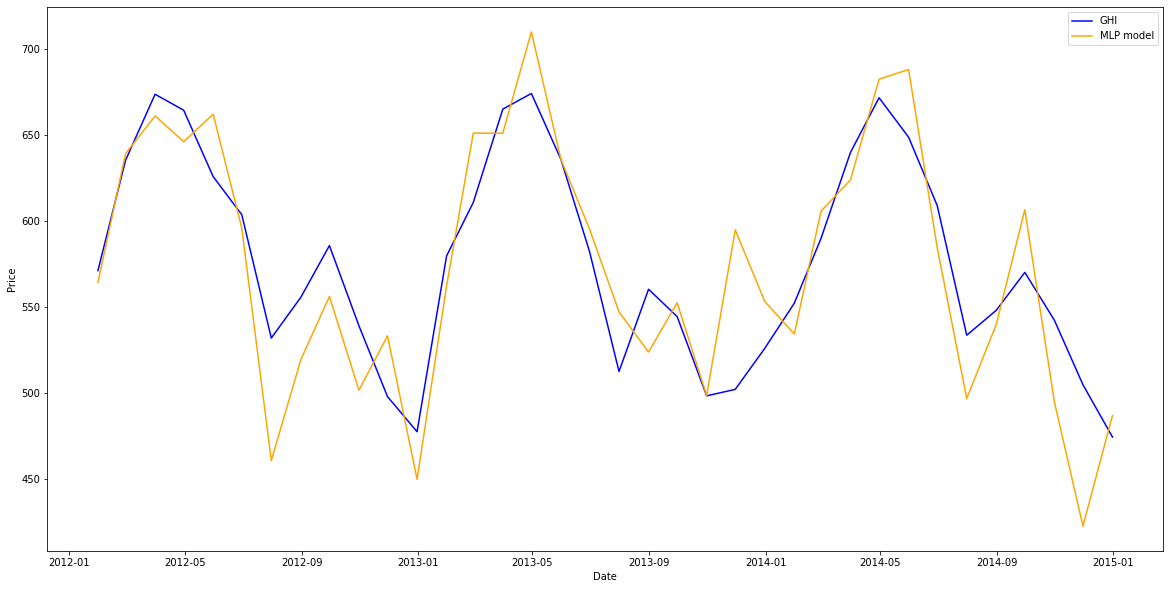

In [25]:
plt.figure(figsize = (20,10))
plt.plot(y_w[144:].index, y_w[144:], color= 'blue', label= 'GHI')
plt.plot(y_w[144:].index,np.asarray(yhat).reshape(36,) , color= 'orange', label= 'MLP model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
WriteDF = pd.DataFrame(columns=['Date', 'GHI'])
WriteDF['Date'] = y_w[144:].index
WriteDF['GHI'] = np.asarray(yhat).reshape(36,)
WriteDF.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/AndhraPradesh1/MLP_monthly.csv')

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_w[144:],np.asarray(yhat).reshape(36,),squared=False)

34.619526082790436

In [27]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_w[144:],np.asarray(yhat).reshape(36,))

0.0496360925152849